# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook


In [2]:
def read_csv( stock_file ):
    if isinstance(stock_file, pd.DataFrame): return stock_file
    
    dataframe = pd.read_csv( stock_file, parse_dates=['Date'] )
    dataframe = dataframe[dataframe.Series == 'EQ']
    dataframe.set_index( dataframe.Date, inplace=True )
    dataframe.drop(['Date'],axis = 1,inplace = True)
    return dataframe

def Daily_mean_return( stock_file ):
    return read_csv( stock_file )['Close Price'].pct_change().dropna().mean()

def Daily_standard_deviation( stock_file ):
    return read_csv( stock_file )['Close Price'].pct_change().dropna().std()

def Annual_mean_Return( stock_file ):
    return Daily_mean_return(stock_file) * 252

def Annual_STD( stock_file ):
    return Daily_standard_deviation(stock_file) * np.sqrt(252)

def getName( stock_file ):
    return re.sub(r'^.+/|\.[^.]+$','', stock_file)

def ReturnVolatility( stock_file ):
    input  = read_csv( stock_file )
    output = DataFrame([{
        "#Name":                        getName( stock_file ),
        "Daily_mean_return":            Daily_mean_return( input ),
        "Daily_standard_deviation":     Daily_standard_deviation( input ),
        "Annual_mean_Return":           Annual_mean_Return( input ),
        "Annual_STD":                   Annual_STD( input )
    }])
    return output

stock= ("INFY.csv")

ReturnVolatility( stock)

,#Name,Annual_STD,Annual_mean_Return,Daily_mean_return,Daily_standard_deviation
0,INFY,0.418994,-0.023617,-0.000094,0.026394


### Query 5.2  - Covariance Matrix

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [3]:
AXISBANK =("AXISBANK.csv")
HDFCBANK=("HDFCBANK.csv")
HEROMOTOCO=("HEROMOTOCO.csv")
NCC=("NCC.csv")
RELIANCE=("RELIANCE.csv")

stock_1 =DataFrame(ReturnVolatility(AXISBANK))
stock_2 =DataFrame(ReturnVolatility(HDFCBANK))
stock_3 =DataFrame(ReturnVolatility(HEROMOTOCO))
stock_4 =DataFrame(ReturnVolatility(NCC))
stock_5 =DataFrame(ReturnVolatility(RELIANCE))

pd.concat([stock_1,stock_2,stock_3,stock_4,stock_5])

,#Name,Annual_STD,Annual_mean_Return,Daily_mean_return,Daily_standard_deviation
0,AXISBANK,0.277917,0.233194,0.000925,0.017507
0,HDFCBANK,0.150248,0.209085,0.000830,0.009465
0,HEROMOTOCO,0.239141,-0.143545,-0.000570,0.015064
0,NCC,0.445222,0.059373,0.000236,0.028046
0,RELIANCE,0.439233,0.087318,0.000346,0.027669


In [4]:
AXISBANK = read_csv('AXISBANK.csv')
HDFCBANK = read_csv('HDFCBANK.csv')
HEROMOTOCO = read_csv('HEROMOTOCO.csv')
NCC = read_csv('NCC.csv')
RELIANCE = read_csv('RELIANCE.csv')

portfolio = pd.concat([AXISBANK['Close Price'],HDFCBANK['Close Price'],HEROMOTOCO['Close Price'],
                      NCC['Close Price'],RELIANCE['Close Price']],axis = 1)
portfolio.columns = ['AXISBANK','HDFCBANK','HEROMOTOCO','NCC','RELIANCE']

portfolio.head()

,AXISBANK,HDFCBANK,HEROMOTOCO,NCC,RELIANCE
Date,,,,,
2017-05-15,500.1,1553.40,3515.45,97.35,1344.10
2017-05-16,501.5,1559.65,3619.40,100.40,1356.30
2017-05-17,502.8,1557.15,3645.95,101.45,1353.10
2017-05-18,492.0,1557.10,3592.05,97.00,1327.35
2017-05-19,501.7,1561.25,3571.65,95.45,1318.85


In [5]:
equal_weights = np.full( portfolio.shape[1], 1/portfolio.shape[1] )
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [6]:
def portfolio_annual_returns(portfolio, weights):
    return np.sum( portfolio.pct_change().mean() * weights ) * 252  
round( portfolio_annual_returns(portfolio, equal_weights), 4 )

0.0891

In [7]:
portfolio_covarence = portfolio.pct_change().cov()
portfolio_covarence

,AXISBANK,HDFCBANK,HEROMOTOCO,NCC,RELIANCE
AXISBANK,0.000307,0.000018,0.000035,0.000127,0.000045
HDFCBANK,0.000018,0.000090,0.000038,0.000043,0.000039
HEROMOTOCO,0.000035,0.000038,0.000227,0.000106,0.000041
NCC,0.000127,0.000043,0.000106,0.000787,0.000116
RELIANCE,0.000045,0.000039,0.000041,0.000116,0.000766


In [8]:
def portfolio_annual_volatility( portfolio, weights ): 
    return np.dot(weights.T, np.dot( portfolio_covarence, weights )) * np.sqrt(252)
round( portfolio_annual_volatility(portfolio, equal_weights), 4 )

0.0022

In [9]:
def portfolio_sharpe_Ratio( portfolio, weights ): 
    return portfolio_annual_returns( portfolio, weights ) / portfolio_annual_volatility( portfolio, weights )
round( portfolio_sharpe_Ratio(portfolio, equal_weights), 4 )

41.3464

In [10]:
print("Portfolio Annualized Mean Return: ", round( portfolio_annual_returns(    portfolio, equal_weights ), 4) )
print("Portfolio Annualized Volatility:  ", round( portfolio_annual_volatility( portfolio, equal_weights ), 4) )

Portfolio Annualized Mean Return:  0.0891
Portfolio Annualized Volatility:   0.0022


### Query 5.3 (Scatter plot)

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [11]:
num_iteration=25000
values = np.zeros((8,num_iteration)) # to store the values of annual return and volatility for different weights
for i in range(num_iteration):
    weights=np.random.random(5)
    weights/=np.sum(weights)
    annual_return = np.sum( portfolio.pct_change().mean() * weights ) * 252
    annual_volatility= np.dot(weights.T, np.dot( portfolio_covarence, weights )) * np.sqrt(252)
    sharpe_Ratio = annual_return/annual_volatility
    values[0,i]=annual_return
    values[1,i]=annual_volatility
    values[2,i]=sharpe_Ratio
    for j in range(len(weights)):
        values[j+3,i]=weights[j]


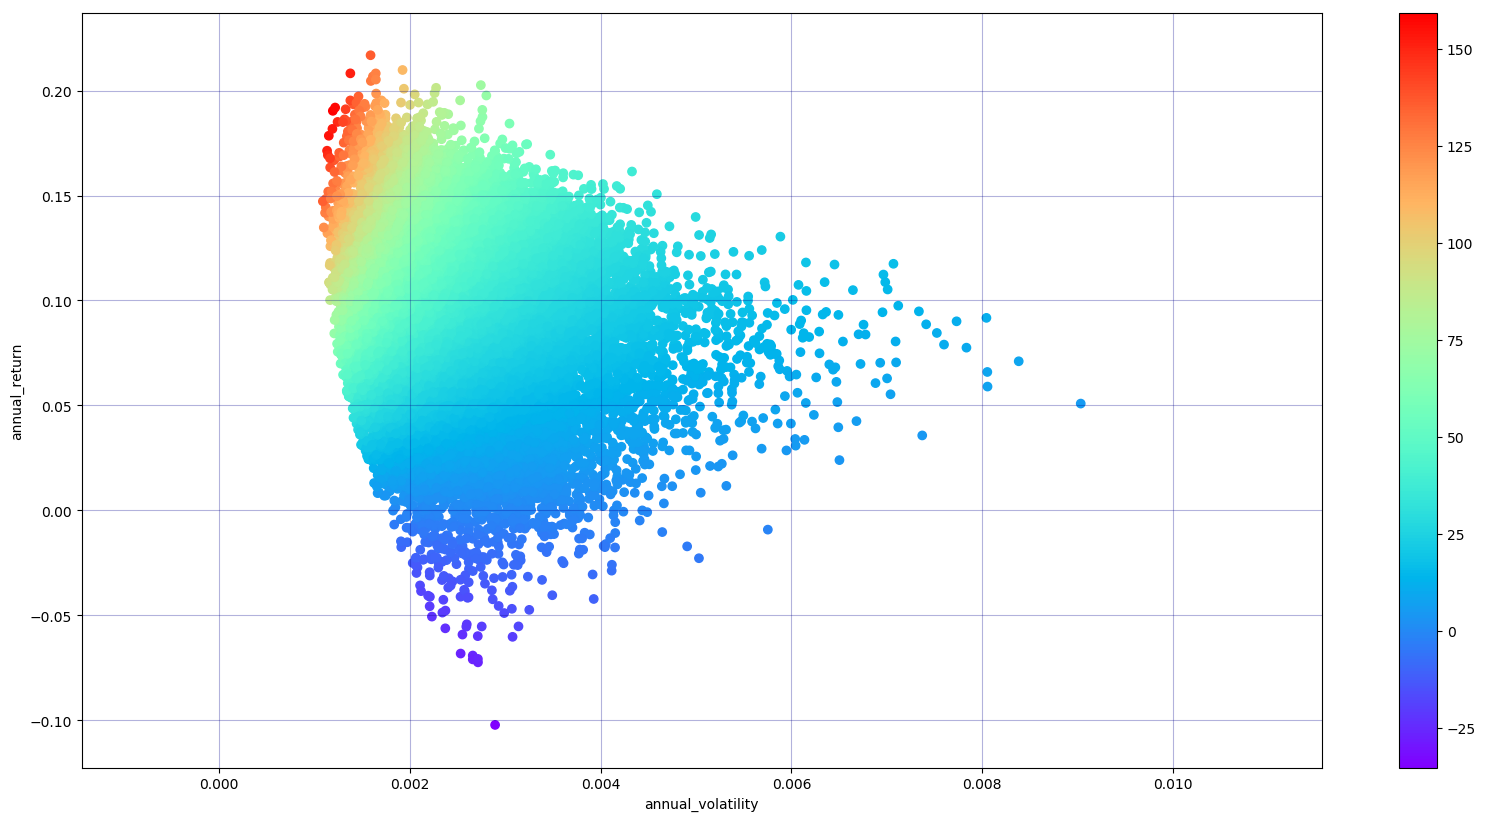

In [12]:
scatter_data = pd.DataFrame(np.transpose(values),columns=['annual_return','annual_volatility','portfolio_sharpe',
                                               'AXISBANK','HDFCBANK','HEROMOTOCO','NCC','RELIANCE'])

plt.figure(figsize = (20,10), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.xlabel('annual_volatility')
plt.ylabel('annual_return')
plt.scatter(scatter_data['annual_volatility'],scatter_data['annual_return'],c=scatter_data['portfolio_sharpe'],cmap='rainbow')
plt.colorbar()
plt.show()

## Query 5.4 
Mark the 2 portfolios where -

>Portfolio 1 - The Sharpe ratio is the highest

>Portfolio 2 - The volatility is the lowest.

In [13]:
max_sharpe=scatter_data.iloc[scatter_data['portfolio_sharpe'].idxmax()]
min_volatility=scatter_data.iloc[scatter_data['annual_volatility'].idxmin()]

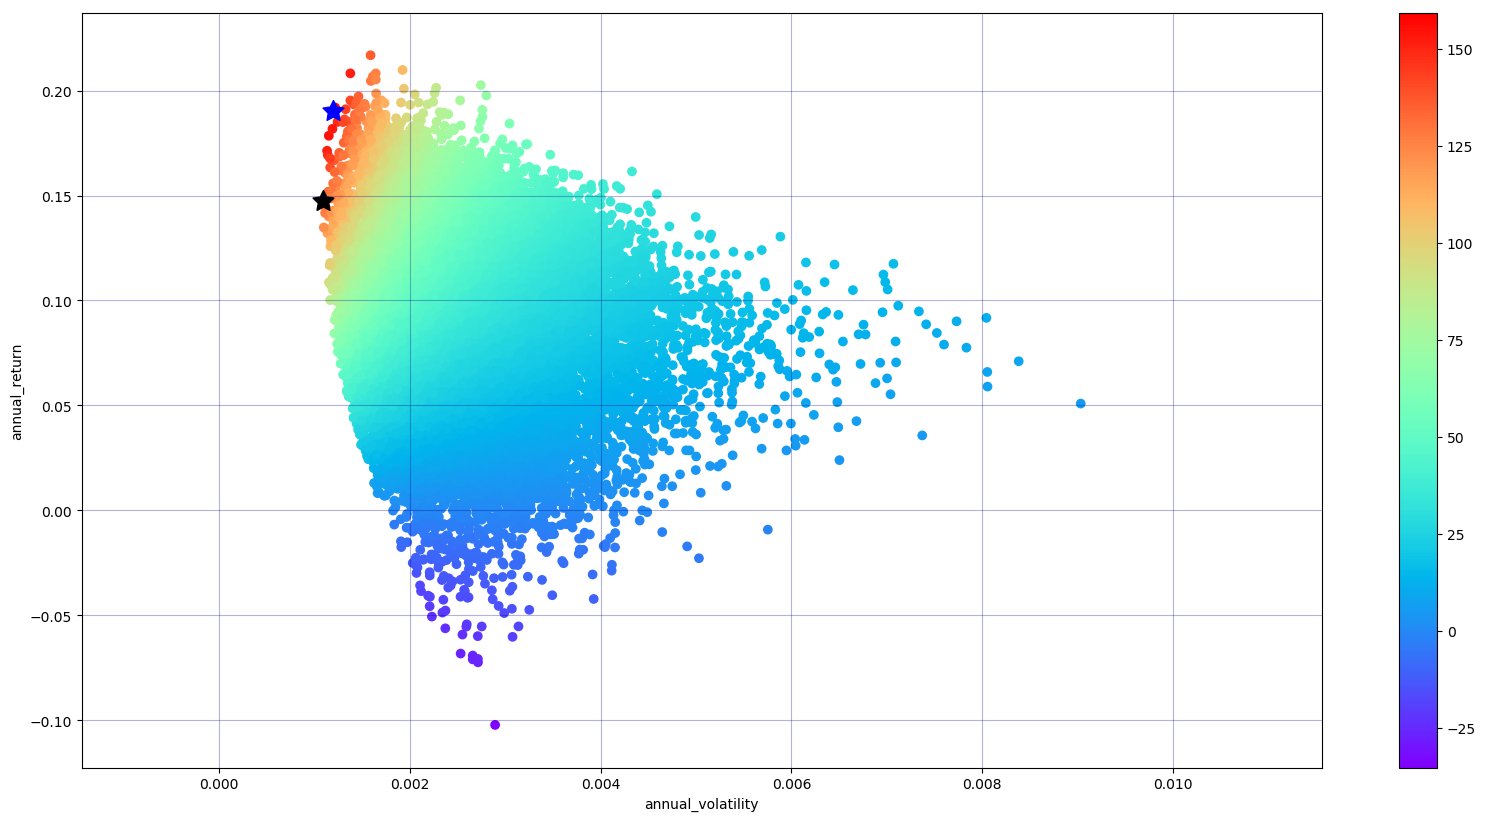

In [14]:
plt.figure(figsize = (20,10), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.xlabel('annual_volatility')
plt.ylabel('annual_return')
plt.scatter(scatter_data['annual_volatility'],scatter_data['annual_return'],c=scatter_data['portfolio_sharpe'],cmap='rainbow')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='b',s=250) # Blue Star = maximum Sharpe Retio
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='black',s=250) # black star=minimum variance
plt.show()